In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import BallTree
from sklearn.model_selection import KFold
from sklearn.base import clone
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import xgboost as xgb
import lightgbm as lgb
import optuna
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import KFold
import optuna
from sklearn.metrics import mean_absolute_error
import optuna
from lightgbm import LGBMRegressor, early_stopping, log_evaluation
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingRegressor, RandomForestRegressor
from lightgbm import LGBMRegressor
import seaborn as sns
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import seaborn as sns
import joblib
import os
from sklearn.preprocessing import LabelEncoder
import joblib


# Data retrieval


In [2]:
point=pd.read_csv('../data/smart_poi_data.csv')

In [3]:
point.columns

Index(['name', 'type', 'lat', 'lon', 'address'], dtype='object')

In [4]:
point.head()

,name,type,lat,lon,address
0,Lê Văn Việt General Hospital,Bệnh viện,10.844929,106.790001,"387 Đ. Lê Văn Việt, Tăng Nhơn Phú A, Thủ Đức, ..."
1,Eastern People Militia Hospital,Bệnh viện,10.845958,106.778488,"50 Đ. Lê Văn Việt, Hiệp Phú, Thủ Đức, Thành ph..."
2,Medical Center 9 District,Bệnh viện,10.845009,106.793797,"Quarter 2, Le Van Viet street, Tang Nhon Phu A..."
3,Thu Duc City Hospital,Bệnh viện,10.864436,106.745690,"29 Phú Châu, Tam Phú, Thủ Đức, Thành phố Hồ Ch..."
4,Thu Duc City Medical Center,Bệnh viện,10.833314,106.779715,"48A Tăng Nhơn Phú, Tăng Nhơn Phú B, Thủ Đức, T..."


In [5]:
point['type'].value_counts()

type
Chợ               372
Bệnh viện         346
Trường đại học    297
Name: count, dtype: int64

In [4]:
bdsc = pd.read_csv("../data/processing/bdsc_data_processed.csv")
bdsc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12711 entries, 0 to 12710
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        12711 non-null  float64
 1   area         12711 non-null  float64
 2   n_Bedrooms   12711 non-null  object 
 3   n_Bathrooms  12711 non-null  object 
 4   house_dir    12711 non-null  object 
 5   balcony_dir  12711 non-null  object 
 6   legal_c      12711 non-null  object 
 7   furniture_c  12711 non-null  object 
 8   project      12711 non-null  bool   
 9   lat          12711 non-null  float64
 10  lon          12711 non-null  float64
 11  NAME_1       12711 non-null  object 
 12  NAME_2       12711 non-null  object 
dtypes: bool(1), float64(4), object(8)
memory usage: 1.2+ MB


In [11]:
bdsc['furniture_c'].unique()

array(['cơ bản', 'đầy đủ', 'không nội thất', 'cao cấp', 'thô', 'đẹp',
       'khác'], dtype=object)

In [7]:
data_c=bdsc.copy()

In [8]:
data_c

,price,area,n_Bedrooms,n_Bathrooms,house_dir,balcony_dir,legal_c,furniture_c,project,lat,lon,NAME_1,NAME_2
0,1900.0,60.00,2,2,khác,khác,Có sổ riêng,cơ bản,True,20.845686,106.650384,Hải Phòng,An Dương
1,1700.0,50.00,1,1,Đông - Bắc,Tây - Nam,Có sổ riêng,cơ bản,True,20.844209,106.648478,Hải Phòng,An Dương
2,1770.0,50.00,1,1,khác,khác,Có sổ riêng,cơ bản,True,20.845692,106.649874,Hải Phòng,An Dương
3,700.0,41.00,1,1,Bắc,Nam,Có sổ riêng,cơ bản,True,20.908416,106.609306,Hải Phòng,An Dương
4,2190.0,64.21,2,2,Đông - Nam,Tây - Nam,khác,cơ bản,True,20.845852,106.650431,Hải Phòng,An Dương
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12706,1200.0,35.00,1,1,khác,khác,Có sổ riêng,cơ bản,True,10.808283,106.480757,Long An,Đức Hòa
12707,1240.0,40.00,2,1,khác,khác,Có sổ riêng,cơ bản,True,10.794218,106.502383,Long An,Đức Hòa
12708,1500.0,50.00,2,2,khác,khác,Có sổ riêng,đầy đủ,True,10.807707,106.481105,Long An,Đức Hòa
12709,1650.0,50.00,2,1,Đông - Bắc,Tây - Nam,Có sổ riêng,đầy đủ,True,10.807590,106.481424,Long An,Đức Hòa


In [9]:
print(data_c.isna().sum())

price          0
area           0
n_Bedrooms     0
n_Bathrooms    0
house_dir      0
balcony_dir    0
legal_c        0
furniture_c    0
project        0
lat            0
lon            0
NAME_1         0
NAME_2         0
dtype: int64


In [10]:
def processing(X, categorical_features):
    # Select numerical columns from the original DataFrame
    numerical_features = X.select_dtypes(include=np.number).columns.tolist()
    X_num = X[numerical_features].copy()

    # Process categorical features
    from sklearn.preprocessing import LabelEncoder
    X_cat = X[categorical_features].copy()
    for col in X_cat.columns:
        X_cat[col] = LabelEncoder().fit_transform(X_cat[col].astype(str))

    # Combine numerical and processed categorical DataFrames
    # Ensure both DataFrames have the same index for correct merging
    X_processed = pd.concat([X_num, X_cat], axis=1)

    return X_processed

In [11]:
categorical_features = [ 'n_Bedrooms', "n_Bathrooms", "balcony_dir", "legal_c", "furniture_c","NAME_1","NAME_2","house_dir","project"]
df_processed_dfc = processing(data_c, categorical_features)

In [12]:
print(df_processed_dfc[df_processed_dfc.columns].skew())  


price          2.579760
area           1.713555
lat            0.479854
lon            1.405204
n_Bedrooms     0.140520
n_Bathrooms    0.085469
balcony_dir   -0.540056
legal_c        2.375839
furniture_c   -0.463894
NAME_1         1.364503
NAME_2        -0.152438
house_dir     -0.524962
project       -4.399036
dtype: float64


In [13]:
df_processed_dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12711 entries, 0 to 12710
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        12711 non-null  float64
 1   area         12711 non-null  float64
 2   lat          12711 non-null  float64
 3   lon          12711 non-null  float64
 4   n_Bedrooms   12711 non-null  int32  
 5   n_Bathrooms  12711 non-null  int32  
 6   balcony_dir  12711 non-null  int32  
 7   legal_c      12711 non-null  int32  
 8   furniture_c  12711 non-null  int32  
 9   NAME_1       12711 non-null  int32  
 10  NAME_2       12711 non-null  int32  
 11  house_dir    12711 non-null  int32  
 12  project      12711 non-null  int32  
dtypes: float64(4), int32(9)
memory usage: 844.2 KB


In [14]:
df_processed_dfc['n_Bathrooms'].unique()

array([1, 0, 2, 3])

In [15]:
df_processed_dfc.head()

,price,area,lat,lon,n_Bedrooms,n_Bathrooms,balcony_dir,legal_c,furniture_c,NAME_1,NAME_2,house_dir,project
0,1900.0,60.00,20.845686,106.650384,1,1,5,0,1,11,0,5,1
1,1700.0,50.00,20.844209,106.648478,0,0,4,0,1,11,0,7,1
2,1770.0,50.00,20.845692,106.649874,0,0,5,0,1,11,0,5,1
3,700.0,41.00,20.908416,106.609306,0,0,1,0,1,11,0,0,1
4,2190.0,64.21,20.845852,106.650431,1,1,4,2,1,11,0,8,1


# Feature Engineering

In [ ]:
def preprocess_data(df):
    X = df.drop(columns=['price'])
    y = df['price']
    
    # Xử lý Skew cho Diện tích (Feature)
    if 'area' in X.columns:
        X['area'] = np.log1p(X['area'])
    
    # Xử lý biến phân loại (Label Encoder)
    # List các cột phân loại
    cat_cols = ['NAME_1', 'NAME_2', 'house_dir', 'balcony_dir', 'legal_c', 'furniture_c','n_Bathrooms','n_Bedrooms','project']
    # Lọc những cột thực sự tồn tại trong data
    valid_cat_cols = [col for col in cat_cols if col in X.columns]
    
    le = LabelEncoder()
    for col in valid_cat_cols:
        X[col] = X[col].astype(str)
        X[col] = le.fit_transform(X[col])
        
    return X, y

In [ ]:

data_c['lat'] = pd.to_numeric(data_c['lat'], errors='coerce')
data_c['lon'] = pd.to_numeric(data_c['lon'], errors='coerce')
point['lat'] = pd.to_numeric(point['lat'], errors='coerce')
point['lon'] = pd.to_numeric(point['lon'], errors='coerce')

# Hàm cốt lõi: Tính khoảng cách đến điểm gần nhất
def add_nearest_distance(df_houses, df_poi, type_name, new_col_name):
    # Lọc POI theo loại (Ví dụ: Chỉ lấy 'Chợ')
    poi_subset = df_poi[df_poi['type'] == type_name]
    
    if len(poi_subset) == 0:
        print(f"Cảnh báo: Không tìm thấy dữ liệu cho loại {type_name}")
        df_houses[new_col_name] = -1 # Giá trị mặc định
        return df_houses

    # 1. Chuyển đổi sang Radians (BallTree yêu cầu)
    house_rad = np.radians(df_houses[['lat', 'lon']].values)
    poi_rad = np.radians(poi_subset[['lat', 'lon']].values)
    
    # 2. Xây dựng cây tìm kiếm (BallTree)
    tree = BallTree(poi_rad, metric='haversine')
    
    # 3. Truy vấn điểm gần nhất (k=1)
    # dist trả về là radian, cần nhân với bán kính trái đất (6371km)
    dist, _ = tree.query(house_rad, k=1)
    
    df_houses[new_col_name] = dist * 6371
    print(f"-> Đã tạo feature: {new_col_name}")
    
    return df_houses

# Hàm nâng cao: Đếm số lượng POI trong bán kính (Ví dụ: 2km)
def add_density_count(df_houses, df_poi, type_name, radius_km, new_col_name):
    poi_subset = df_poi[df_poi['type'] == type_name]
    
    if len(poi_subset) == 0:
        return df_houses

    house_rad = np.radians(df_houses[['lat', 'lon']].values)
    poi_rad = np.radians(poi_subset[['lat', 'lon']].values)
    
    tree = BallTree(poi_rad, metric='haversine')
    
    # query_radius trả về danh sách chỉ số các điểm nằm trong bán kính
    # radius_km cần đổi về radian: km / 6371
    radius_rad = radius_km / 6371
    counts = tree.query_radius(house_rad, r=radius_rad, count_only=True)
    
    df_houses[new_col_name] = counts
    print(f"-> Đã tạo feature: {new_col_name} (Bán kính {radius_km}km)")
    return df_houses

# --- THỰC THI ---
print("Bắt đầu Feature Engineering...")

# 1. Tính khoảng cách gần nhất (Nearest Distance) - Quan trọng nhất
df_processed = add_nearest_distance(data_c, point, 'Chợ', 'dist_nearest_market')
df_processed = add_nearest_distance(data_c, point, 'Bệnh viện', 'dist_nearest_hospital')
df_processed = add_nearest_distance(data_c, point, 'Trường đại học', 'dist_nearest_university')

# 2. Tính mật độ (Density) - Feature " cho giá 
# Logic: Khu vực có nhiều trường ĐH trong bán kính 3km thì nhu cầu thuê trọ cực cao -> Giá nhà cao.
df_processed = add_density_count(df_processed, point, 'Trường đại học', radius_km=3.0, new_col_name='count_uni_in_3km')

# 3. Tính mật độ bệnh viện (Sức khỏe)
# Logic: Trong bán kính 5km có bao nhiêu bệnh viện? (Chỉ số tiếp cận y tế)
df_processed = add_density_count(df_processed, point, 'Bệnh viện', radius_km=5.0, new_col_name='count_hospital_in_5km')

print("\n--- KẾT QUẢ MẪU ---")
cols_view = ['dist_nearest_market', 'dist_nearest_university', 'count_uni_in_3km', 'price']
print(df_processed[cols_view].head())

Bắt đầu Feature Engineering...
-> Đã tạo feature: dist_nearest_market
-> Đã tạo feature: dist_nearest_hospital
-> Đã tạo feature: dist_nearest_university
-> Đã tạo feature: count_uni_in_3km (Bán kính 3.0km)
-> Đã tạo feature: count_hospital_in_5km (Bán kính 5.0km)

--- KẾT QUẢ MẪU ---
   dist_nearest_market  dist_nearest_university  count_uni_in_3km   price
0             1.510059                 3.982511                 0  1900.0
1             1.403180                 4.148075                 0  1700.0
2             1.460618                 4.034479                 0  1770.0
3             4.935232                11.281142                 0   700.0
4             1.508113                 3.981436                 0  2190.0


In [18]:
df_processed.drop(columns=['lat','lon'])

,price,area,n_Bedrooms,n_Bathrooms,house_dir,balcony_dir,legal_c,furniture_c,project,NAME_1,NAME_2,dist_nearest_market,dist_nearest_hospital,dist_nearest_university,count_uni_in_3km,count_hospital_in_5km
0,1900.0,60.00,2,2,khác,khác,Có sổ riêng,cơ bản,True,Hải Phòng,An Dương,1.510059,1.074039,3.982511,0,17
1,1700.0,50.00,1,1,Đông - Bắc,Tây - Nam,Có sổ riêng,cơ bản,True,Hải Phòng,An Dương,1.403180,1.060152,4.148075,0,16
2,1770.0,50.00,1,1,khác,khác,Có sổ riêng,cơ bản,True,Hải Phòng,An Dương,1.460618,1.033823,4.034479,0,17
3,700.0,41.00,1,1,Bắc,Nam,Có sổ riêng,cơ bản,True,Hải Phòng,An Dương,4.935232,5.625703,11.281142,0,0
4,2190.0,64.21,2,2,Đông - Nam,Tây - Nam,khác,cơ bản,True,Hải Phòng,An Dương,1.508113,1.066023,3.981436,0,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12706,1200.0,35.00,1,1,khác,khác,Có sổ riêng,cơ bản,True,Long An,Đức Hòa,11.672664,14.239466,12.742116,0,0
12707,1240.0,40.00,2,1,khác,khác,Có sổ riêng,cơ bản,True,Long An,Đức Hòa,9.309309,11.503129,10.227546,0,0
12708,1500.0,50.00,2,2,khác,khác,Có sổ riêng,đầy đủ,True,Long An,Đức Hòa,11.630242,14.181792,12.694414,0,0
12709,1650.0,50.00,2,1,Đông - Bắc,Tây - Nam,Có sổ riêng,đầy đủ,True,Long An,Đức Hòa,11.594663,14.144623,12.658014,0,0


In [19]:
df_processed.head()

,price,area,n_Bedrooms,n_Bathrooms,house_dir,balcony_dir,legal_c,furniture_c,project,lat,lon,NAME_1,NAME_2,dist_nearest_market,dist_nearest_hospital,dist_nearest_university,count_uni_in_3km,count_hospital_in_5km
0,1900.0,60.00,2,2,khác,khác,Có sổ riêng,cơ bản,True,20.845686,106.650384,Hải Phòng,An Dương,1.510059,1.074039,3.982511,0,17
1,1700.0,50.00,1,1,Đông - Bắc,Tây - Nam,Có sổ riêng,cơ bản,True,20.844209,106.648478,Hải Phòng,An Dương,1.403180,1.060152,4.148075,0,16
2,1770.0,50.00,1,1,khác,khác,Có sổ riêng,cơ bản,True,20.845692,106.649874,Hải Phòng,An Dương,1.460618,1.033823,4.034479,0,17
3,700.0,41.00,1,1,Bắc,Nam,Có sổ riêng,cơ bản,True,20.908416,106.609306,Hải Phòng,An Dương,4.935232,5.625703,11.281142,0,0
4,2190.0,64.21,2,2,Đông - Nam,Tây - Nam,khác,cơ bản,True,20.845852,106.650431,Hải Phòng,An Dương,1.508113,1.066023,3.981436,0,17


# Feature Extraction

In [50]:
df_processed['n_Bathrooms'].unique()

array(['2', '1', '3', '4+'], dtype=object)

In [51]:
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12711 entries, 0 to 12710
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   price                    12711 non-null  float64
 1   area                     12711 non-null  float64
 2   n_Bedrooms               12711 non-null  object 
 3   n_Bathrooms              12711 non-null  object 
 4   house_dir                12711 non-null  object 
 5   balcony_dir              12711 non-null  object 
 6   legal_c                  12711 non-null  object 
 7   furniture_c              12711 non-null  object 
 8   project                  12711 non-null  bool   
 9   lat                      12711 non-null  float64
 10  lon                      12711 non-null  float64
 11  NAME_1                   12711 non-null  object 
 12  NAME_2                   12711 non-null  object 
 13  dist_nearest_market      12711 non-null  float64
 14  dist_nearest_hospital 

In [52]:
X, y = preprocess_data(df_processed)

# Split 1: Tách Test ra (15%)
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.15, random_state=32)
# Split 2: Tách Valid ra từ Train_full (15% của tổng ~ 17.6% của phần còn lại)
# Cách tính: 0.15 / (1 - 0.15) = 0.1764...
y_test_log = np.log1p(y_test)
y_train_full_log = np.log1p(y_train_full)
# Log Transform cho Target (Giá)
print(f"Kích thước: Train/Full={X_train_full.shape}, Test={X_test.shape}")

Kích thước: Train/Full=(10804, 17), Test=(1907, 17)


In [53]:
X_train_full.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10804 entries, 11457 to 10967
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   area                     10804 non-null  float64
 1   n_Bedrooms               10804 non-null  int32  
 2   n_Bathrooms              10804 non-null  int32  
 3   house_dir                10804 non-null  int32  
 4   balcony_dir              10804 non-null  int32  
 5   legal_c                  10804 non-null  int32  
 6   furniture_c              10804 non-null  int32  
 7   project                  10804 non-null  int32  
 8   lat                      10804 non-null  float64
 9   lon                      10804 non-null  float64
 10  NAME_1                   10804 non-null  int32  
 11  NAME_2                   10804 non-null  int32  
 12  dist_nearest_market      10804 non-null  float64
 13  dist_nearest_hospital    10804 non-null  float64
 14  dist_nearest_university

# Train model

In [ ]:

def train_eval_pipeline(model_input, model_name, X_full, y_full_log, X_test_in, y_test_in):
    print(f"🔄 Đang xử lý K-Fold CV cho: {model_name}...")
    
    # 1. Thiết lập K-Fold
    kf = KFold(n_splits=5, shuffle=True, random_state=32)
    
    # List lưu kết quả từng fold
    mae_folds, r2_folds, mape_folds = [], [], []
    
    # 2. Vòng lặp Cross-Validation
    for fold, (train_idx, val_idx) in enumerate(kf.split(X_full)):
        # Tách dữ liệu cho fold hiện tại
        X_tr, X_val = X_full.iloc[train_idx], X_full.iloc[val_idx]
        y_tr_log, y_val_log = y_full_log.iloc[train_idx], y_full_log.iloc[val_idx]
        
        # Clone mô hình gốc để đảm bảo huấn luyện mới mỗi fold
        model = clone(model_input)
        
        # Huấn luyện (giữ logic try-except cho eval_set)
        try:
            model.fit(
                X_tr, y_tr_log, 
                eval_set=[(X_val, y_val_log)], 
                verbose=False
            )
        except (TypeError, ValueError):
            # Dành cho Random Forest (không hỗ trợ eval_set)
            model.fit(X_tr, y_tr_log)
        
        # Dự đoán trên tập Val của Fold (Log scale)
        pred_val_log = model.predict(X_val)
        
        # Chuyển về giá thực tế
        pred_val_real = np.expm1(pred_val_log)
        y_val_real = np.expm1(y_val_log)
        
        # Lưu metrics
        r2_folds.append(r2_score(y_val_real, pred_val_real))
        mae_folds.append(mean_absolute_error(y_val_real, pred_val_real))
        mape_folds.append(mean_absolute_percentage_error(y_val_real, pred_val_real) * 100)

    # 3. Huấn luyện lại mô hình cuối cùng trên TOÀN BỘ tập Train Full
    print(f"   -> Retraining {model_name} on full data...")
    final_model = clone(model_input)
    final_model.fit(X_full, y_full_log) # Fit full không cần eval_set để tận dụng tối đa dữ liệu
    
    # 4. Đánh giá trên tập TEST (Dữ liệu chưa từng thấy)
    pred_test_log = final_model.predict(X_test_in)
    pred_test_real = np.expm1(pred_test_log)
    y_test_real = np.expm1(y_test_in) # y_test_in ở đây là log, cần chuyển về real để so sánh
    
    # Tính metrics Test
    test_r2 = r2_score(y_test_real, pred_test_real)
    test_mae = mean_absolute_error(y_test_real, pred_test_real)
    test_mape = mean_absolute_percentage_error(y_test_real, pred_test_real) * 100

    # 5. Đóng gói kết quả
    return {
        'Model': model_name,
        # Kết quả trung bình của 5 lần chạy trên tập Valid (Độ ổn định)
        'CV Mean R2': np.mean(r2_folds), 
        'CV Mean MAE': np.mean(mae_folds), 
        'CV Mean MAPE (%)': np.mean(mape_folds),
        # Kết quả thực tế trên tập Test
        'Test R2': test_r2,   
        'Test MAE': test_mae,   
        'Test MAPE (%)': test_mape
    }

In [56]:
results_log = []

# --- KHỞI TẠO MODEL (GIỮ NGUYÊN THAM SỐ CỦA BẠN) ---

# 1. Random Forest 


rf_model = RandomForestRegressor(
    n_estimators=300, max_depth=20, min_samples_split=5, 
    min_samples_leaf=2, max_features='sqrt', n_jobs=-1, random_state=32
)
results_log.append(train_eval_pipeline(rf_model, "Random Forest", X_train_full, y_train_full_log, X_test, y_test_log))

# 2. XGBoost
xgb_model = xgb.XGBRegressor(
    n_estimators=1000, learning_rate=0.05, max_depth=7,
    subsample=0.8, colsample_bytree=0.8, n_jobs=-1, random_state=32
)
results_log.append(train_eval_pipeline(xgb_model, "XGBoost", X_train_full, y_train_full_log, X_test, y_test_log))

# 3. LightGBM
lgbm_model = lgb.LGBMRegressor(
    n_estimators=1000, learning_rate=0.05, max_depth=10,
    num_leaves=31, random_state=32, verbose=-1
)
results_log.append(train_eval_pipeline(lgbm_model, "LightGBM", X_train_full, y_train_full_log, X_test, y_test_log))

# --- HIỂN THỊ BẢNG SO SÁNH ---
df_results = pd.DataFrame(results_log)
pd.options.display.float_format = '{:,.4f}'.format

print("\n=== BẢNG TỔNG HỢP KẾT QUẢ (K-FOLD CV & TEST) ===")
display(df_results)

🔄 Đang xử lý K-Fold CV cho: Random Forest...
   -> Retraining Random Forest on full data...
🔄 Đang xử lý K-Fold CV cho: XGBoost...
   -> Retraining XGBoost on full data...
🔄 Đang xử lý K-Fold CV cho: LightGBM...
   -> Retraining LightGBM on full data...

=== BẢNG TỔNG HỢP KẾT QUẢ (K-FOLD CV & TEST) ===


,Model,CV Mean R2,CV Mean MAE,CV Mean MAPE (%),Test R2,Test MAE,Test MAPE (%)
0,Random Forest,0.8848,789.7529,13.2969,0.8830,770.9968,12.0386
1,XGBoost,0.9214,689.4485,11.8769,0.9191,677.5014,10.7077
2,LightGBM,0.9180,717.9304,12.3730,0.9069,718.2053,11.2927


In [ ]:

def objective_xgb_cv(trial):
    # 1. Định nghĩa không gian tham số (Giữ nguyên như của bạn)
    params = {
        'n_estimators': 3000,
        'learning_rate': trial.suggest_float('learning_rate', 0.005, 0.05, log=True),
        'max_depth': trial.suggest_int('max_depth', 4, 10),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'subsample': trial.suggest_float('subsample', 0.6, 0.9),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 0.9),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.01, 10.0, log=True),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.01, 10.0, log=True),
        
        'objective': 'reg:squarederror',
        'n_jobs': -1,
        'random_state': 32,
        
        # Đưa early_stopping_rounds vào đây (hoạt động tốt với phiên bản XGBoost mới)
        'early_stopping_rounds': 50
    }
    
    # 2. Thiết lập K-Fold
    # Sử dụng 5-Fold để cân bằng giữa tốc độ và độ tin cậy
    kf = KFold(n_splits=5, shuffle=True, random_state=32)
    
    mae_scores = []
    
    # 3. Vòng lặp Cross-Validation
    # Lưu ý: Sử dụng X_train_full và y_train_full_log
    for train_idx, val_idx in kf.split(X_train_full):
        # Tách dữ liệu cho fold hiện tại
        X_tr, X_val = X_train_full.iloc[train_idx], X_train_full.iloc[val_idx]
        y_tr_log, y_val_log = y_train_full_log.iloc[train_idx], y_train_full_log.iloc[val_idx]
        
        # Khởi tạo mô hình mới mỗi fold
        model = xgb.XGBRegressor(**params)
        
        # Huấn luyện
        model.fit(
            X_tr, y_tr_log,
            eval_set=[(X_val, y_val_log)],
            verbose=False
        )
        
        # Dự đoán trên tập Validation của fold này
        pred_log = model.predict(X_val)
        
        # Chuyển về giá thực tế (Inverse Log) để tính MAE chuẩn xác
        pred_real = np.expm1(pred_log)
        y_true_real = np.expm1(y_val_log)
        
        mae = mean_absolute_error(y_true_real, pred_real)
        mae_scores.append(mae)
    
    # 4. Trả về MAE trung bình của 5 folds
    return np.mean(mae_scores)

# --- CHẠY OPTUNA ---
print("Đang bắt đầu Tuning XGBoost với K-Fold CV...")
study_xgb = optuna.create_study(direction='minimize')

# Chạy tối ưu hóa
# Lưu ý: Quá trình này sẽ lâu hơn gấp 5 lần so với cách cũ (vì chạy 5 folds)
# Bạn có thể giảm n_trials xuống 20-30 nếu máy yếu
study_xgb.optimize(objective_xgb_cv, n_trials=30) 

print("-" * 30)
print(f" XGBoost - MAE trung bình thấp nhất: {study_xgb.best_value:,.0f} triệu")
print(" Bộ tham số tối ưu:", study_xgb.best_params)

# Lưu tham số tốt nhất
best_params_xgb = study_xgb.best_params

[I 2025-12-05 21:04:53,565] A new study created in memory with name: no-name-59ca9f42-83e0-41d4-9d5a-7e14fbb424ee


⚡ Đang bắt đầu Tuning XGBoost với K-Fold CV...


[I 2025-12-05 21:05:30,508] Trial 0 finished with value: 687.2263102916174 and parameters: {'learning_rate': 0.00983390031480554, 'max_depth': 9, 'min_child_weight': 5, 'subsample': 0.6898447185225813, 'colsample_bytree': 0.7001573178889339, 'reg_alpha': 0.356320335554737, 'reg_lambda': 0.5279080153155806}. Best is trial 0 with value: 687.2263102916174.
[I 2025-12-05 21:05:55,384] Trial 1 finished with value: 854.01243957053 and parameters: {'learning_rate': 0.005891513493423465, 'max_depth': 8, 'min_child_weight': 6, 'subsample': 0.8957435131297997, 'colsample_bytree': 0.8382845015555167, 'reg_alpha': 6.556584881210614, 'reg_lambda': 0.047577103192287855}. Best is trial 0 with value: 687.2263102916174.
[I 2025-12-05 21:06:27,490] Trial 2 finished with value: 691.0723035549598 and parameters: {'learning_rate': 0.014137594431301876, 'max_depth': 10, 'min_child_weight': 1, 'subsample': 0.744620498245542, 'colsample_bytree': 0.8303561154118537, 'reg_alpha': 0.03367650591411614, 'reg_lambd

------------------------------
🏆 XGBoost - MAE trung bình thấp nhất: 680 triệu
✅ Bộ tham số tối ưu: {'learning_rate': 0.04089849182976702, 'max_depth': 7, 'min_child_weight': 3, 'subsample': 0.7785540138003433, 'colsample_bytree': 0.7395795869251055, 'reg_alpha': 0.16927142337966197, 'reg_lambda': 0.17792183637810144}


In [64]:
def evaluate_model_comprehensive_cv(model_input, model_name, X_full, y_full, X_test, y_test):
    """
    Hàm đánh giá mô hình sử dụng K-Fold Cross-Validation và kiểm tra trên tập Test riêng biệt.
    """
    print(f" Đang xử lý K-Fold CV cho: {model_name}...")
    
    # 1. Chuẩn bị dữ liệu Log Scale
    y_full_log = np.log1p(y_full)
    y_test_log = np.log1p(y_test)
    
    # 2. Thiết lập K-Fold (5-Fold)
    kf = KFold(n_splits=5, shuffle=True, random_state=32)
    
    # List lưu kết quả từng fold
    cv_scores = {'r2': [], 'mae': [], 'rmse': [], 'mape': []}
    
    # --- BƯỚC 3: VÒNG LẶP CROSS-VALIDATION ---
    for fold, (train_idx, val_idx) in enumerate(kf.split(X_full)):
        # Tách dữ liệu cho fold hiện tại
        X_tr, X_val = X_full.iloc[train_idx], X_full.iloc[val_idx]
        y_tr_log, y_val_log = y_full_log.iloc[train_idx], y_full_log.iloc[val_idx]
        
        # Clone mô hình gốc để đảm bảo huấn luyện mới mỗi fold
        model = clone(model_input)
        
        # Huấn luyện (Fit)
        try:
            # Dành cho XGBoost, LightGBM (có hỗ trợ eval_set)
            model.fit(
                X_tr, y_tr_log, 
                eval_set=[(X_val, y_val_log)], 
                verbose=False
            )
        except (TypeError, ValueError):
            # Dành cho Random Forest, Linear Regression... (không hỗ trợ eval_set)
            model.fit(X_tr, y_tr_log)
        
        # Dự đoán trên tập Validation của Fold (Log scale)
        pred_val_log = model.predict(X_val)
        
        # Chuyển về giá thực tế (Inverse Log)
        pred_val_real = np.expm1(pred_val_log)
        y_val_real = np.expm1(y_val_log) # Giá thực của fold validation
        
        # Tính metrics và lưu lại
        cv_scores['r2'].append(r2_score(y_val_real, pred_val_real))
        cv_scores['mae'].append(mean_absolute_error(y_val_real, pred_val_real))
        cv_scores['rmse'].append(np.sqrt(mean_squared_error(y_val_real, pred_val_real)))
        cv_scores['mape'].append(mean_absolute_percentage_error(y_val_real, pred_val_real) * 100)

    # --- BƯỚC 4: HUẤN LUYỆN LẠI TRÊN TOÀN BỘ TẬP FULL (FIX LỖI TẠI ĐÂY) ---
    print(f"   -> Đang huấn luyện lại {model_name} trên toàn bộ dữ liệu Train...")
    
    # Tạo một bản sao sạch (không có early_stopping_rounds) cho XGBoost
    final_model = clone(model_input)
    
    # Kiểm tra nếu là XGBoost và xóa tham số gây lỗi
    if isinstance(final_model, xgb.XGBRegressor):
        # Đây là cách để tạo một bản sao không chứa early_stopping_rounds
        final_params = final_model.get_params()
        if 'early_stopping_rounds' in final_params:
            del final_params['early_stopping_rounds']
        
        # Khởi tạo lại mô hình chỉ dùng cho fit full
        final_model = xgb.XGBRegressor(**final_params)


    # Huấn luyện trên toàn bộ X_full mà không cần eval_set
    final_model.fit(X_full, y_full_log) 
    
    # --- BƯỚC 5: ĐÁNH GIÁ TRÊN TẬP TEST (DỮ LIỆU CHƯA TỪNG THẤY) ---
    pred_test_log = final_model.predict(X_test)
    pred_test_real = np.expm1(pred_test_log)
    
    # Tính metrics Test
    test_r2 = r2_score(y_test, pred_test_real)
    test_mae = mean_absolute_error(y_test, pred_test_real)
    test_rmse = np.sqrt(mean_squared_error(y_test, pred_test_real))
    test_mape = mean_absolute_percentage_error(y_test, pred_test_real) * 100

    # --- BƯỚC 6: TRẢ VỀ KẾT QUẢ ---
    return {
        'Model': model_name,
        # Kết quả trung bình của 5 lần chạy (Độ ổn định)
        'CV Mean R2': np.mean(cv_scores['r2']), 
        'CV Mean MAE': np.mean(cv_scores['mae']), 
        'CV Mean RMSE': np.mean(cv_scores['rmse']),
        'CV Mean MAPE (%)': np.mean(cv_scores['mape']),
        
        # Kết quả thực tế trên tập Test (Khả năng tổng quát hóa)
        'Test R2': test_r2,   
        'Test MAE': test_mae, 
        'Test RMSE': test_rmse,  
        'Test MAPE (%)': test_mape
    }

In [ ]:

# --- 1. THIẾT LẬP THAM SỐ ---
# Thêm các tham số cố định vào bộ best_params
final_params = best_params_xgb.copy()
final_params['n_estimators'] = 3000
final_params['objective'] = 'reg:squarederror'
final_params['n_jobs'] = -1
final_params['random_state'] = 32


final_params['early_stopping_rounds'] = 100 

# --- 2. KHỞI TẠO MÔ HÌNH ---
print("\nĐang khởi tạo mô hình Final với tham số tối ưu...")
# Lưu ý: Chúng ta KHÔNG gọi fit() ở đây, hàm evaluate sẽ tự làm việc đó
final_model = xgb.XGBRegressor(**final_params)

# --- 3. ĐÁNH GIÁ TOÀN DIỆN VỚI K-FOLD CV & TEST ---
print("=== BẮT ĐẦU QUÁ TRÌNH ĐÁNH GIÁ & HUẤN LUYỆN CUỐI CÙNG ===")

results_xgb = evaluate_model_comprehensive_cv(
    model_input=final_model,
    model_name="XGBoost Optimized",
    X_full=X_train_full,  # Truyền vào tập Train đầy đủ (85% dữ liệu)
    y_full=y_train_full,  # Truyền vào giá trị thực (Hàm sẽ tự log transform)
    X_test=X_test,   # Tập Test hold-out (15% dữ liệu)
    y_test=y_test    # Giá trị thực tập Test
)

# --- 4. IN KẾT QUẢ ---
print("\n" + "="*40)
print(f"KẾT QUẢ TỔNG HỢP: {results_xgb['Model']}")
print("="*40)
print(f" CV Mean R2   : {results_xgb['CV Mean R2']:.4f}")
print(f" CV Mean MAPE : {results_xgb['CV Mean MAPE (%)']:.2f}%")
print("-" * 20)
print(f" Test R2      : {results_xgb['Test R2']:.4f}")
print(f" Test MAE     : {results_xgb['Test MAE']:,.0f}")
print(f" Test RMSE    : {results_xgb['Test RMSE']:,.0f}")
print(f" Test MAPE    : {results_xgb['Test MAPE (%)']:.2f}%")
print("="*40)


Đang khởi tạo mô hình Final với tham số tối ưu...
=== BẮT ĐẦU QUÁ TRÌNH ĐÁNH GIÁ & HUẤN LUYỆN CUỐI CÙNG ===
 Đang xử lý K-Fold CV cho: XGBoost Optimized...
   -> Đang huấn luyện lại XGBoost Optimized trên toàn bộ dữ liệu Train...

KẾT QUẢ TỔNG HỢP: XGBoost Optimized
 CV Mean R2   : 0.9249
 CV Mean MAPE : 11.75%
--------------------
 Test R2      : 0.9237
 Test MAE     : 670
 Test RMSE    : 1,301
 Test MAPE    : 10.64%


In [ ]:


# --- BƯỚC 1: CHUẨN BỊ DỮ LIỆU CHO OPTUNA ---
y_train_full_log = np.log1p(y_train_full) # Log biến y gốc

X_opt_train, X_opt_val, y_opt_train, y_opt_val = train_test_split(
    X_train_full, y_train_full_log, 
    test_size=0.2, 
    random_state=42
)

print(f"Dữ liệu Tuning RF: Train={X_opt_train.shape}, Val={X_opt_val.shape}")

# --- BƯỚC 2: ĐỊNH NGHĨA HÀM MỤC TIÊU ---
def objective_rf(trial):
    # 1. Định nghĩa không gian tham số
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 400),
        'max_depth': trial.suggest_int('max_depth', 5, 20),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 5),
        # 'max_features' quy định số lượng feature được xem xét khi chia nút
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2', 1.0]), 
        'n_jobs': -1,
        'random_state': 32
    }
    
    # 2. Khởi tạo mô hình
    model = RandomForestRegressor(**params)
    
    # 3. Huấn luyện (Fit trên tập train log đã chia ở trên)
    model.fit(X_opt_train, y_opt_train)
    
    # 4. Dự đoán
    y_pred_log = model.predict(X_opt_val)
    
    # 5. Inverse Log để tính MAE thực tế
    y_pred_real = np.expm1(y_pred_log)
    y_true_real = np.expm1(y_opt_val)
    
    mae = mean_absolute_error(y_true_real, y_pred_real)
    
    return mae

# --- BƯỚC 3: CHẠY OPTUNA ---
print("\n Bắt đầu Tuning Random Forest (có thể mất vài phút)...")
optuna.logging.set_verbosity(optuna.logging.WARNING) # Giảm bớt log thừa
study_rf = optuna.create_study(direction='minimize')
study_rf.optimize(objective_rf, n_trials=20) 

print("-" * 30)
print(f"RF - MAE thấp nhất (Validation tạm): {study_rf.best_value:,.0f}")
print(" RF - Best Params:", study_rf.best_params)

# --- BƯỚC 4: ĐÁNH GIÁ LẠI BẰNG COMPREHENSIVE CV ---
# Lấy tham số tốt nhất
best_params_rf = study_rf.best_params
best_params_rf['n_jobs'] = -1
best_params_rf['random_state'] = 32

# Khởi tạo mô hình cuối cùng
final_rf_model = RandomForestRegressor(**best_params_rf)

print("\n=== ĐÁNH GIÁ FINAL MODEL BẰNG K-FOLD CV ===")
# Gọi hàm đánh giá (Hàm này sẽ train lại trên toàn bộ 85% dữ liệu)
results_rf = evaluate_model_comprehensive_cv(
    model_input=final_rf_model,
    model_name="Random Forest Optimized",
    X_full=X_train_full,  # Dữ liệu Train đầy đủ
    y_full=y_train_full,  # Giá thực đầy đủ
    X_test=X_test,        # Tập Test Hold-out
    y_test=y_test
)

print("\n" + "="*40)
print(f"KẾT QUẢ CUỐI CÙNG: {results_rf['Model']}")
print("="*40)
print(f" CV Mean R2   : {results_rf['CV Mean R2']:.4f}")
print(f" CV Mean MAPE : {results_rf['CV Mean MAPE (%)']:.2f}%")
print("-" * 20)
print(f" Test MAPE    : {results_rf['Test MAPE (%)']:.2f}%")
print("="*40)

Dữ liệu Tuning RF: Train=(8643, 17), Val=(2161, 17)

 Bắt đầu Tuning Random Forest (có thể mất vài phút)...
------------------------------
RF - MAE thấp nhất (Validation tạm): 834
 RF - Best Params: {'n_estimators': 100, 'max_depth': 18, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'log2'}

=== ĐÁNH GIÁ FINAL MODEL BẰNG K-FOLD CV ===
 Đang xử lý K-Fold CV cho: Random Forest Optimized...
   -> Đang huấn luyện lại Random Forest Optimized trên toàn bộ dữ liệu Train...

KẾT QUẢ CUỐI CÙNG: Random Forest Optimized
 CV Mean R2   : 0.8834
 CV Mean MAPE : 13.43%
--------------------
 Test MAPE    : 12.20%


In [ ]:


final_params = best_params_rf.copy()
final_params['n_jobs'] = -1
final_params['random_state'] = 32

print("\nĐang khởi tạo mô hình Random Forest Final...")
#
final_model_rf = RandomForestRegressor(**final_params)


results_rf = evaluate_model_comprehensive_cv(
    model_input=final_model_rf,
    model_name="RandomForest Optimized",
    X_full=X_train_full,  # Sử dụng tập train lớn nhất (đã gộp train+valid cũ)
    y_full=y_train_full,  # Truyền giá thực (hàm sẽ tự log)
    X_test=X_test,        # Tập test hold-out
    y_test=y_test         # Truyền giá thực
)

# --- 4. IN KẾT QUẢ ---
print("\n" + "="*40)
print(f"KẾT QUẢ TỔNG HỢP: {results_rf['Model']}")
print("="*40)
print(f" CV Mean R2   : {results_rf['CV Mean R2']:.4f}")
print(f" CV Mean MAPE : {results_rf['CV Mean MAPE (%)']:.2f}%")
print("-" * 20)
print(f" Test R2      : {results_rf['Test R2']:.4f}")
print(f" Test MAE     : {results_rf['Test MAE']:,.0f}")
print(f" Test RMSE    : {results_rf['Test RMSE']:,.0f}")
print(f" Test MAPE    : {results_rf['Test MAPE (%)']:.2f}%")
print("="*40)


Đang khởi tạo mô hình Random Forest Final...
 Đang xử lý K-Fold CV cho: RandomForest Optimized...
   -> Đang huấn luyện lại RandomForest Optimized trên toàn bộ dữ liệu Train...

KẾT QUẢ TỔNG HỢP: RandomForest Optimized
 CV Mean R2   : 0.8834
 CV Mean MAPE : 13.43%
--------------------
 Test R2      : 0.8894
 Test MAE     : 773
 Test RMSE    : 1,566
 Test MAPE    : 12.20%


In [ ]:



y_train_full_log = np.log1p(y_train_full)

X_opt_train, X_opt_val, y_opt_train, y_opt_val = train_test_split(
    X_train_full, y_train_full_log, 
    test_size=0.2, 
    random_state=42
)
print(f"Dữ liệu Tuning LightGBM: Train={X_opt_train.shape}, Val={X_opt_val.shape}")

# --- BƯỚC 2: HÀM MỤC TIÊU OPTUNA ---
def objective_lgbm(trial):
    
    params = {
        'n_estimators': 3000,
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1, log=True),
        'num_leaves': trial.suggest_int('num_leaves', 20, 150),
        'max_depth': trial.suggest_int('max_depth', 5, 15),
        'min_child_samples': trial.suggest_int('min_child_samples', 10, 100),
        'subsample': trial.suggest_float('subsample', 0.5, 0.9),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 0.9),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-5, 10.0, log=True),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-5, 10.0, log=True),
        'n_jobs': -1,
        'random_state': 32,
        'verbosity': -1
    }

    model = LGBMRegressor(**params)
    
    
    model.fit(
        X_opt_train, y_opt_train,
        eval_set=[(X_opt_val, y_opt_val)],
        eval_metric='mae',
        callbacks=[
            early_stopping(stopping_rounds=50, verbose=False), # Tắt log verbose
            log_evaluation(period=0) # Tắt in log quá trình
        ]
    )
    
    #  Dự đoán và tính MAE thực tế
    y_pred_log = model.predict(X_opt_val)
    y_pred_real = np.expm1(y_pred_log)
    y_true_real = np.expm1(y_opt_val)
    
    return mean_absolute_error(y_true_real, y_pred_real)


print("\n Bắt đầu Tuning LightGBM...")
optuna.logging.set_verbosity(optuna.logging.WARNING) # Giảm bớt log hệ thống
study_lgbm = optuna.create_study(direction='minimize')
study_lgbm.optimize(objective_lgbm, n_trials=50) # LightGBM nhanh hơn RF nên chạy 50 trials OK

print("-" * 30)
print(f" LightGBM - MAE thấp nhất (Tuning Set): {study_lgbm.best_value:,.0f}")
print(" LightGBM - Best Params:", study_lgbm.best_params)



Dữ liệu Tuning LightGBM: Train=(8643, 17), Val=(2161, 17)

 Bắt đầu Tuning LightGBM...
------------------------------
 LightGBM - MAE thấp nhất (Tuning Set): 731
 LightGBM - Best Params: {'learning_rate': 0.05826723193627417, 'num_leaves': 101, 'max_depth': 11, 'min_child_samples': 35, 'subsample': 0.8212252973633528, 'colsample_bytree': 0.6170932958299553, 'reg_alpha': 0.6292667763915292, 'reg_lambda': 3.0711861702177856}


In [69]:

final_params_lgbm = study_lgbm.best_params.copy()
final_params_lgbm.update({
    'n_estimators': 3000,
    'n_jobs': -1,
    'random_state': 32,
    'verbosity': -1
})

# Khởi tạo mô hình final
print("\n=== ĐÁNH GIÁ LIGHTGBM FINAL MODEL BẰNG K-FOLD CV ===")
final_lgbm_model = LGBMRegressor(**final_params_lgbm)

# Gọi hàm đánh giá (Tự động train lại trên toàn bộ 85% dữ liệu)
results_lgbm = evaluate_model_comprehensive_cv(
    model_input=final_lgbm_model,
    model_name="LightGBM Optimized",
    X_full=X_train_full,  # Tập Train đầy đủ
    y_full=y_train_full,  # Giá thực đầy đủ
    X_test=X_test,        # Tập Test Hold-out
    y_test=y_test
)


print("\n" + "="*40)
print(f"KẾT QUẢ TỔNG HỢP: {results_lgbm['Model']}")
print("="*40)
print(f" CV Mean MAPE : {results_lgbm['CV Mean MAPE (%)']:.2f}%")
print("-" * 20)
print(f" Test R2      : {results_lgbm['Test R2']:.4f}")
print(f" Test MAE     : {results_lgbm['Test MAE']:,.0f}")
print(f" Test RMSE    : {results_lgbm['Test RMSE']:,.0f}")
print(f" Test MAPE    : {results_lgbm['Test MAPE (%)']:.2f}%")
print("="*40)


=== ĐÁNH GIÁ LIGHTGBM FINAL MODEL BẰNG K-FOLD CV ===
 Đang xử lý K-Fold CV cho: LightGBM Optimized...
   -> Đang huấn luyện lại LightGBM Optimized trên toàn bộ dữ liệu Train...

KẾT QUẢ TỔNG HỢP: LightGBM Optimized
 CV Mean MAPE : 11.98%
--------------------
 Test R2      : 0.9197
 Test MAE     : 679
 Test RMSE    : 1,334
 Test MAPE    : 10.82%


In [ ]:
# --- 1. CHUẨN BỊ THAM SỐ (CLEAN UP) ---
# XGBoost: Cần copy và đảm bảo không có early_stopping trong constructor nếu dùng trong Voting
xgb_params_voting = final_params.copy() # Lấy từ bước XGBoost trước đó
xgb_params_voting['n_estimators'] = 3000
xgb_params_voting['early_stopping_rounds'] = None # Bắt buộc None vì Voting ko có eval_set

# LightGBM: Lấy params tốt nhất
lgbm_params_voting = final_params_lgbm.copy() # Lấy từ bước LightGBM
lgbm_params_voting['n_estimators'] = 3000
lgbm_params_voting['verbosity'] = -1

# Random Forest: Lấy params tốt nhất
rf_params_voting = best_params_rf.copy()
rf_params_voting['n_estimators'] = 300 # RF chạy lâu, 300 là đủ ổn định cho Voting
rf_params_voting['n_jobs'] = -1

# --- 2. KHỞI TẠO CÁC ESTIMATORS ---
est_xgb = xgb.XGBRegressor(**xgb_params_voting)
est_rf = RandomForestRegressor(**rf_params_voting)
est_lgbm = LGBMRegressor(**lgbm_params_voting)


weights = [0.4, 0.1, 0.5] 

print(f"⚖️ Khởi tạo Voting Regressor với trọng số: XGB={weights[0]}, RF={weights[1]}, LGBM={weights[2]}")

voting_model = VotingRegressor(
    estimators=[
        ('xgb', est_xgb),
        ('rf', est_rf),
        ('lgbm', est_lgbm)
    ],
    weights=weights,
    n_jobs=-1
)

#
print("\n🚀 Đang chạy đánh giá Voting Model (Sẽ mất thời gian)...")

results_voting = evaluate_model_comprehensive_cv(
    model_input=voting_model,
    model_name="Voting Ensemble (XGB+RF+LGBM)",
    X_full=X_train_full,  # Dữ liệu Train đầy đủ (85%)
    y_full=y_train_full,  # Giá thực (chưa log)
    X_test=X_test,        # Tập Test Hold-out (15%)
    y_test=y_test         # Giá thực
)

# --- 5. IN KẾT QUẢ SO SÁNH ---
print("\n" + "="*40)
print(f"🏆 KẾT QUẢ CUỐI CÙNG: {results_voting['Model']}")
print("="*40)
print(f"✅ CV Mean R2   : {results_voting['CV Mean R2']:.4f}")
print(f"✅ CV Mean MAPE : {results_voting['CV Mean MAPE (%)']:.2f}%")
print("-" * 20)
print(f"🚀 Test R2      : {results_voting['Test R2']:.4f}")
print(f"🚀 Test MAE     : {results_voting['Test MAE']:,.0f}")
print(f"🚀 Test RMSE    : {results_voting['Test RMSE']:,.0f}")
print(f"🚀 Test MAPE    : {results_voting['Test MAPE (%)']:.2f}%")
print("="*40)

⚖️ Khởi tạo Voting Regressor với trọng số: XGB=0.4, RF=0.1, LGBM=0.5

🚀 Đang chạy đánh giá Voting Model (Sẽ mất thời gian)...
 Đang xử lý K-Fold CV cho: Voting Ensemble (XGB+RF+LGBM)...
   -> Đang huấn luyện lại Voting Ensemble (XGB+RF+LGBM) trên toàn bộ dữ liệu Train...

🏆 KẾT QUẢ CUỐI CÙNG: Voting Ensemble (XGB+RF+LGBM)
✅ CV Mean R2   : 0.9154
✅ CV Mean MAPE : 11.93%
--------------------
🚀 Test R2      : 0.9198
🚀 Test MAE     : 670
🚀 Test RMSE    : 1,334
🚀 Test MAPE    : 10.71%


🔄 Đang chuẩn bị huấn luyện lại XGBoost trên toàn bộ dữ liệu Train...
✅ Đã huấn luyện xong!

--- KẾT QUẢ ĐÁNH GIÁ: XGBoost  ---
✅ R2 Score : 0.9237
✅ MAE      : 670
✅ RMSE     : 1,301
✅ MAPE     : 10.64%


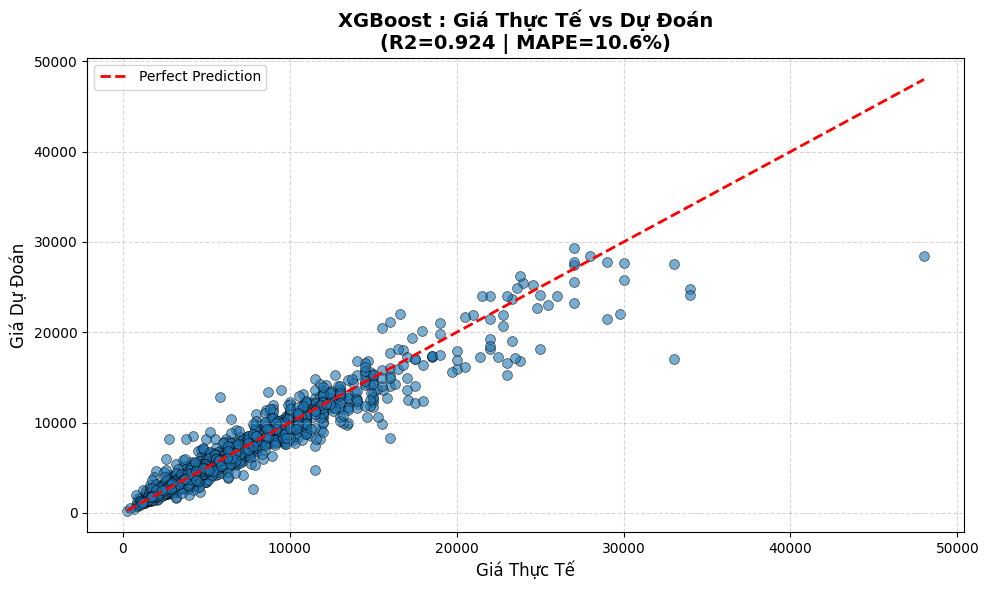

In [ ]:


# --- 1. HÀM VẼ BIỂU ĐỒ ---
def evaluate_and_plot_prediction(model, X_val, y_val_log, title_prefix="Model"):
    """
    Dự đoán, đánh giá metrics và vẽ biểu đồ Actual vs Predicted
    """
    # Dự đoán (kết quả đang ở dạng Log)
    y_pred_log = model.predict(X_val)
    
    # Chuyển về giá trị thực (Inverse Log)
    y_val_real = np.expm1(y_val_log)
    y_pred_real = np.expm1(y_pred_log)
    
    # Tính Metrics
    r2 = r2_score(y_val_real, y_pred_real)
    mae = mean_absolute_error(y_val_real, y_pred_real)
    rmse = np.sqrt(mean_squared_error(y_val_real, y_pred_real))
    mape = mean_absolute_percentage_error(y_val_real, y_pred_real) * 100
    
    print(f"\n--- KẾT QUẢ ĐÁNH GIÁ: {title_prefix} ---")
    print(f"✅ R2 Score : {r2:.4f}")
    print(f"✅ MAE      : {mae:,.0f}")
    print(f"✅ RMSE     : {rmse:,.0f}")
    print(f"✅ MAPE     : {mape:.2f}%")
    
    # Vẽ biểu đồ
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_val_real, y=y_pred_real, alpha=0.6, color='#1f77b4', edgecolor='k', s=50)
    
    # Vẽ đường chuẩn y=x
    max_val = max(y_val_real.max(), y_pred_real.max())
    min_val = min(y_val_real.min(), y_pred_real.min())
    plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', linewidth=2, label='Perfect Prediction')
    
    plt.title(f'{title_prefix}: Giá Thực Tế vs Dự Đoán\n(R2={r2:.3f} | MAPE={mape:.1f}%)', fontsize=14, fontweight='bold')
    plt.xlabel('Giá Thực Tế', fontsize=12)
    plt.ylabel('Giá Dự Đoán', fontsize=12)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.ticklabel_format(style='plain', axis='both') 
    plt.tight_layout()
    plt.show()

# --- 2. HUẤN LUYỆN LẠI XGBOOST (PHẦN QUAN TRỌNG ĐÃ SỬA) ---


y_train_full_log = np.log1p(y_train_full)


final_model.set_params(early_stopping_rounds=None)


final_model.fit(X_train_full, y_train_full_log)
print(" Đã huấn luyện xong!")

# ---  CHUẨN BỊ DỮ LIỆU TEST & VẼ ---
# Đảm bảo y_test_log tồn tại
if 'y_test_log' not in globals():
    y_test_log = np.log1p(y_test)

# Gọi hàm đánh giá (Sửa tên thành XGBoost Final)
evaluate_and_plot_prediction(final_model, X_test, y_test_log, "XGBoost ")

C:\Users\phamh\AppData\Local\Temp\ipykernel_23168\609815343.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


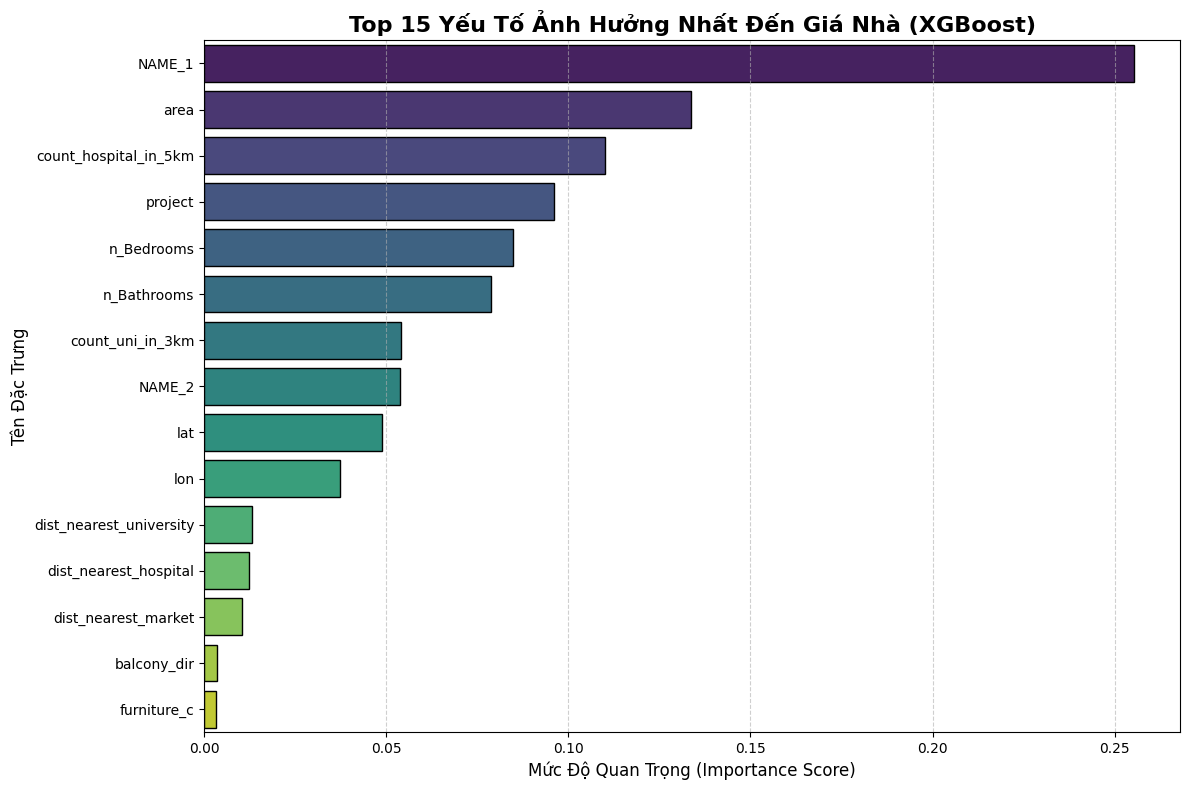

--- BẢNG CHI TIẾT TOP 10 ---
                 Feature  Importance
0                 NAME_1      0.2552
1                   area      0.1337
2  count_hospital_in_5km      0.1101
3                project      0.0960
4             n_Bedrooms      0.0848
5            n_Bathrooms      0.0789
6       count_uni_in_3km      0.0540
7                 NAME_2      0.0538
8                    lat      0.0487
9                    lon      0.0374


In [ ]:

def plot_feature_importance(model, feature_names, top_n=20):
    """
    Hàm vẽ biểu đồ Feature Importance đẹp bằng Seaborn
    """
    # 1. Trích xuất mức độ quan trọng
    # XGBoost có thuộc tính feature_importances_
    importances = model.feature_importances_
    
    # 2. Tạo DataFrame để dễ xử lý
    feature_imp_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    })
    
    # 3. Sắp xếp giảm dần theo mức độ quan trọng
    feature_imp_df = feature_imp_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)
    
    # 4. Vẽ biểu đồ
    plt.figure(figsize=(12, 8))
    
    # Sử dụng barplot của Seaborn
    sns.barplot(
        data=feature_imp_df.head(top_n), # Chỉ lấy Top N
        x='Importance', 
        y='Feature', 
        palette='viridis', # Bảng màu đẹp (xanh-tím-vàng)
        edgecolor='black'
    )
    
    plt.title(f'Top {top_n} Yếu Tố Ảnh Hưởng Nhất Đến Giá Nhà (XGBoost)', fontsize=16, fontweight='bold')
    plt.xlabel('Mức Độ Quan Trọng (Importance Score)', fontsize=12)
    plt.ylabel('Tên Đặc Trưng', fontsize=12)
    plt.grid(axis='x', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()
    
    # In ra bảng số liệu cụ thể
    print("--- BẢNG CHI TIẾT TOP 10 ---")
    print(feature_imp_df.head(10))

# --- GỌI HÀM VẼ ---
# X_train_full.columns là danh sách tên các cột (Feature names)
plot_feature_importance(final_model, X_train_full.columns, top_n=15)

In [84]:
import yaml
import os

def save_all_params_to_yaml(rf_params, xgb_params, lgbm_params, folder_path='../model_params'):
    models_map = {
        'best_params_rf.yaml': rf_params,
        'xgb_params.yaml': xgb_params,
        'best_params_lgbm.yaml': lgbm_params
    }

    print(f"⬇️ ĐANG LƯU 3 BỘ THAM SỐ VÀO '{folder_path}'...")
    
    # 3. Vòng lặp lưu từng file
    for filename, params in models_map.items():
        file_path = os.path.join(folder_path, filename)
        try:
            with open(file_path, 'w') as f:
                # default_flow_style=False giúp file yaml dễ đọc hơn (xuống dòng)
                yaml.dump(params, f, sort_keys=False, default_flow_style=False)
            print(f"   ✅ Đã lưu thành công: {filename}")
        except Exception as e:
            print(f"   ❌ Lỗi khi lưu {filename}: {e}")


    """
    Hàm đọc lại 3 file tham số từ thư mục.
    """
    print(f"\n⬆️ ĐANG TẢI LẠI THAM SỐ TỪ '{folder_path}'...")
    
    loaded_params = {}
    filenames = ['best_params_rf.yaml', 'xgb_params.yaml',  'best_params_lgbm.yaml']
    
    for filename in filenames:
        file_path = os.path.join(folder_path, filename)
        key_name = filename.replace('.yaml', '') # Tên key trong dict kết quả
        
        if os.path.exists(file_path):
            with open(file_path, 'r') as f:
                loaded_params[key_name] = yaml.safe_load(f)
            print(f"   ✅ Đã tải: {filename}")
        else:
            print(f"   ⚠️ Không tìm thấy file: {filename}")
            loaded_params[key_name] = None
            
    return loaded_params
save_all_params_to_yaml(best_params_rf, best_params_xgb, final_params_lgbm)



⬇️ ĐANG LƯU 3 BỘ THAM SỐ VÀO '../model_params'...
   ✅ Đã lưu thành công: best_params_rf.yaml
   ✅ Đã lưu thành công: xgb_params.yaml
   ✅ Đã lưu thành công: best_params_lgbm.yaml

⬆️ ĐANG TẢI LẠI THAM SỐ TỪ '../model_params'...
   ✅ Đã tải: best_params_rf.yaml
   ✅ Đã tải: xgb_params.yaml
   ✅ Đã tải: best_params_lgbm.yaml


{'best_params_rf': {'n_estimators': 100,
  'max_depth': 18,
  'min_samples_split': 5,
  'min_samples_leaf': 2,
  'max_features': 'log2',
  'n_jobs': -1,
  'random_state': 32},
 'xgb_params': {'learning_rate': 0.04089849182976702,
  'max_depth': 7,
  'min_child_weight': 3,
  'subsample': 0.7785540138003433,
  'colsample_bytree': 0.7395795869251055,
  'reg_alpha': 0.16927142337966197,
  'reg_lambda': 0.17792183637810144},
 'best_params_lgbm': {'learning_rate': 0.05826723193627417,
  'num_leaves': 101,
  'max_depth': 11,
  'min_child_samples': 35,
  'subsample': 0.8212252973633528,
  'colsample_bytree': 0.6170932958299553,
  'reg_alpha': 0.6292667763915292,
  'reg_lambda': 3.0711861702177856,
  'n_estimators': 3000,
  'n_jobs': -1,
  'random_state': 32,
  'verbosity': -1}}

In [ ]:

# 1. Tạo thư mục chứa artifacts (Kiểm tra nếu chưa có thì tạo)
save_dir = '../models'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# -------------------------------------------
# A. LƯU MÔ HÌNH CHÍNH (VOTING REGRESSOR)
# -------------------------------------------
# XGB là mô hình bạn đã train xong
model_path = os.path.join(save_dir, 'XGBoot_model.pkl')
joblib.dump(final_model, model_path)
print(f" ✅ Đã lưu Model: {model_path}")

# -------------------------------------------
# B. TÁI TẠO VÀ LƯU LABEL ENCODERS
# -------------------------------------------
encoders = {}

# DANH SÁCH QUAN TRỌNG: Phải khớp hoàn toàn với danh sách trong hàm preprocess_data
cat_cols = [
    'NAME_1', 'NAME_2', 'house_dir', 'balcony_dir', 
    'legal_c', 'furniture_c', 'n_Bathrooms', 'n_Bedrooms', 'project'
]

print(" ⏳ Đang tái tạo và lưu Label Encoders...")

for col in cat_cols:
    # Chỉ xử lý nếu cột tồn tại trong dữ liệu gốc
    if col in df_processed.columns:
        # 1. Tạo mới object LabelEncoder cho TỪNG cột (Quan trọng)
        le = LabelEncoder()
        
        # 2. Fit lại trên dữ liệu gốc
        # LƯU Ý: Phải .astype(str) giống hệt lúc train để mapping không bị sai lệch
        le.fit(df_processed[col].astype(str))
        
        # 3. Lưu vào dictionary
        encoders[col] = le
    else:
        print(f" ⚠️ Cảnh báo: Cột '{col}' không tìm thấy trong df_processed!")

# Lưu dictionary chứa tất cả encoders vào 1 file duy nhất
enc_path = os.path.join(save_dir, 'label_encoders.pkl')
joblib.dump(encoders, enc_path)
print(f" ✅ Đã lưu Encoders: {enc_path}")

# -------------------------------------------
# C. LƯU THÔNG TIN CẤU HÌNH (META DATA)
# -------------------------------------------
# Nên lưu thêm danh sách cột log transform để lúc dự đoán biết đường xử lý
config = {
    'log_columns': ['area'],
    'cat_columns': cat_cols,
    'feature_names': list(X_train_full.columns) # <--- Lưu danh sách cột chuẩn tại đây
}
joblib.dump(config, '../models/config.pkl')


 ✅ Đã lưu Model: ../models\XGBoot_model.pkl
 ⏳ Đang tái tạo và lưu Label Encoders...
 ✅ Đã lưu Encoders: ../models\label_encoders.pkl


['../models/config.pkl']

In [ ]:
# 1. Tạo thư mục
if not os.path.exists('../Web_Demo'):
    os.makedirs('../Web_Demo')
# 2. LƯU CÁC FILE CẦN THIẾT (Bỏ qua project map)
point.to_csv('../Web_Demo/poi_data.csv', index=False)
# 3. LƯU DỮ LIỆU THAM CHIẾU (Cho Spatial Lag)
X_ref = X_train_full.copy()
y_ref = np.expm1(y_train_full_log) 
ref_df = pd.DataFrame({
    'lat': X_ref['lat'],
    'lon': X_ref['lon'],
    'price_per_m2': y_ref / X_ref['area']
})
ref_df.to_csv('../Web_Demo/spatial_reference.csv', index=False)

print("✅ Đã xuất 4 file (Model, Encoders, POI, SpatialRef) thành công!")

✅ Đã xuất 4 file (Model, Encoders, POI, SpatialRef) thành công!


In [110]:
import pickle
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

class DataPreprocessor:
    def __init__(self):
        self.label_encoders = {}  # Dictionary lưu encoder cho TỪNG cột
        self.feature_names = None
        self.categorical_columns = ['NAME_1', 'NAME_2', 'house_dir', 'balcony_dir', 
                                   'legal_c', 'furniture_c', 'n_Bathrooms', 
                                   'n_Bedrooms', 'project']
    
    def fit_transform(self, X):
        """
        Fit các encoder và transform - ĐÚNG VỚI preprocess_data() của bạn
        Input: X đã có đầy đủ features (bao gồm cả các features địa lý)
        """
        X_processed = X.copy()
        
        # 1. Xử lý Skew cho Diện tích
        if 'area' in X_processed.columns:
            X_processed['area'] = np.log1p(X_processed['area'])
        
        # 2. Xử lý biến phân loại - MỖI CỘT MỘT ENCODER RIÊNG
        valid_cat_cols = [col for col in self.categorical_columns if col in X_processed.columns]
        
        for col in valid_cat_cols:
            le = LabelEncoder()  # Tạo encoder MỚI cho mỗi cột
            X_processed[col] = X_processed[col].astype(str)
            X_processed[col] = le.fit_transform(X_processed[col])
            self.label_encoders[col] = le  # Lưu encoder riêng cho cột này
        
        # 3. Lưu tên các features (thứ tự quan trọng!)
        self.feature_names = X_processed.columns.tolist()
        
        return X_processed
    
    def transform(self, X):
       
        X_processed = X.copy()
        
        # 1. Xử lý Skew cho Diện tích
        if 'area' in X_processed.columns:
            X_processed['area'] = np.log1p(X_processed['area'])
        
        # 2. Transform các biến phân loại bằng encoder đã lưu
        for col, le in self.label_encoders.items():
            if col in X_processed.columns:
                X_processed[col] = X_processed[col].astype(str)
                
                # XỬ LÝ GIÁ TRỊ MỚI: Nếu giá trị chưa thấy trong training -> gán về class đầu tiên
                X_processed[col] = X_processed[col].apply(
                    lambda x: x if x in le.classes_ else le.classes_[0]
                )
                X_processed[col] = le.transform(X_processed[col])
        
        # 3. Đảm bảo thứ tự cột GIỐNG HỆT training
        if self.feature_names:
            missing_cols = set(self.feature_names) - set(X_processed.columns)
            if missing_cols:
                raise ValueError(f"❌ Thiếu các cột: {missing_cols}")
            
            X_processed = X_processed[self.feature_names]
        
        return X_processed
    
    def save(self, filepath):
        """Lưu preprocessor ra file"""
        with open(filepath, 'wb') as f:
            pickle.dump(self, f)
        print(f"✓ Đã lưu preprocessor tại: {filepath}")
    
    @staticmethod
    def load(filepath):
        """Load preprocessor từ file"""
        with open(filepath, 'rb') as f:
            return pickle.load(f)

In [111]:
X = df_processed.drop(columns=['price'])

In [112]:
print("="*70)
print("🔍 THÔNG TIN DỮ LIỆU ĐẦU VÀO")
print("="*70)
print(f"📊 Shape: {X.shape}")
print(f"📋 Columns ({len(X.columns)} cột):")
for i, col in enumerate(X.columns, 1):
    dtype = X[col].dtype
    n_unique = X[col].nunique()
    print(f"  {i:2d}. {col:30s} | dtype: {str(dtype):10s} | unique: {n_unique:5d}")

# Bước 2: Khởi tạo và fit preprocessor
print("\n" + "="*70)
print("⚙️  BẮT ĐẦU FIT PREPROCESSOR")
print("="*70)

preprocessor = DataPreprocessor()
X_transformed = preprocessor.fit_transform(X)

🔍 THÔNG TIN DỮ LIỆU ĐẦU VÀO
📊 Shape: (12711, 17)
📋 Columns (17 cột):
   1. area                           | dtype: float64    | unique:   995
   2. n_Bedrooms                     | dtype: object     | unique:     4
   3. n_Bathrooms                    | dtype: object     | unique:     4
   4. house_dir                      | dtype: object     | unique:     9
   5. balcony_dir                    | dtype: object     | unique:     9
   6. legal_c                        | dtype: object     | unique:     3
   7. furniture_c                    | dtype: object     | unique:     7
   8. project                        | dtype: bool       | unique:     2
   9. lat                            | dtype: float64    | unique: 12106
  10. lon                            | dtype: float64    | unique: 12106
  11. NAME_1                         | dtype: object     | unique:    31
  12. NAME_2                         | dtype: object     | unique:   102
  13. dist_nearest_market            | dtype: float64  

In [113]:
print("\n✅ ĐÃ FIT XONG!")
print(f"📊 Shape sau transform: {X_transformed.shape}")
print(f"📋 Columns sau transform: {X_transformed.columns.tolist()}")

# Bước 3: Hiển thị thông tin encoders
print("\n" + "="*70)
print("🔑 THÔNG TIN CÁC LABEL ENCODERS ĐÃ LƯU")
print("="*70)
for col, le in preprocessor.label_encoders.items():
    n_classes = len(le.classes_)
    print(f"\n📌 {col}:")
    print(f"   - Số classes: {n_classes}")
    print(f"   - Classes: {le.classes_[:5]}{'...' if n_classes > 5 else ''}")


✅ ĐÃ FIT XONG!
📊 Shape sau transform: (12711, 17)
📋 Columns sau transform: ['area', 'n_Bedrooms', 'n_Bathrooms', 'house_dir', 'balcony_dir', 'legal_c', 'furniture_c', 'project', 'lat', 'lon', 'NAME_1', 'NAME_2', 'dist_nearest_market', 'dist_nearest_hospital', 'dist_nearest_university', 'count_uni_in_3km', 'count_hospital_in_5km']

🔑 THÔNG TIN CÁC LABEL ENCODERS ĐÃ LƯU

📌 NAME_1:
   - Số classes: 31
   - Classes: ['Bà Rịa - Vũng Tàu' 'Bình Dương' 'Bình Định' 'Bắc Giang' 'Bắc Ninh']...

📌 NAME_2:
   - Số classes: 102
   - Classes: ['An Dương' 'Ba Đình' 'Biên Hòa' 'Bình Chánh' 'Bình Thuỷ']...

📌 house_dir:
   - Số classes: 9
   - Classes: ['Bắc' 'Nam' 'Tây' 'Tây - Bắc' 'Tây - Nam']...

📌 balcony_dir:
   - Số classes: 9
   - Classes: ['Bắc' 'Nam' 'Tây' 'Tây - Bắc' 'Tây - Nam']...

📌 legal_c:
   - Số classes: 3
   - Classes: ['Có sổ riêng' 'Hợp đồng mua bán' 'khác']

📌 furniture_c:
   - Số classes: 7
   - Classes: ['cao cấp' 'cơ bản' 'khác' 'không nội thất' 'thô']...

📌 n_Bathrooms:
   - S

In [119]:
print("\n" + "="*70)
print("💾 LƯU PREPROCESSOR")
print("="*70)
preprocessor.save('house_price_preprocessor.pkl')


💾 LƯU PREPROCESSOR
✓ Đã lưu preprocessor tại: house_price_preprocessor.pkl


In [118]:
print(f"\n✅ HOÀN THÀNH!")
print(f"   - File đã lưu: house_price_preprocessor.pkl")
print(f"   - Số features: {len(preprocessor.feature_names)}")
print(f"   - Số encoders: {len(preprocessor.label_encoders)}")


✅ HOÀN THÀNH!
   - File đã lưu: house_price_preprocessor.pkl
   - Số features: 17
   - Số encoders: 9


In [ ]:
import pandas as pd

# Lấy 1 dòng từ train
row = X_train_full.iloc[[0]]

# Predict bằng encoder + model trong app
y_pred = model.predict(row)

# Predict trong notebook train
y_pred_train = final_model.predict(row)

print(y_pred, y_pred_train)